In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
from lightweight_clustered_energy_forecasts.utils.paths import data_dir
import pandas as pd
import numpy as np
import seaborn as sns

## Funciones auxiliares

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def graficar_serie(df, obs='', titulo=''):
    '''
    Permite graficar la Serie de Tiempo y mostrar simultáneamente
    sus valores extremos.
    
    Parámetros:
    - df: DataFrame de Pandas con la(s) Serie(s) de Tiempo
    - obs: nombre de la columna a graficar
    - titulo: el título del gráfico
    '''
    # Gráfico vacío
    fig, ax = plt.subplots(1,1)
    
    # Gráfico inicial
    if type(df) == pd.DataFrame:
        ax = sns.pointplot(data=df, x=df.index, y=obs, markers='')
    else:
        # Convertir Serie de Pandas a DataFrame de Pandas y graficar
        df = df.to_frame(name=obs) 
        ax = sns.pointplot(data=df, x=df.index, y=obs, markers='')
    
    # Dibujar sólo N=10 marcas temporales (en caso de tener series de tiempo)
    # con demasiadas marcas
    n_ticks = 10
    locator = mdates.AutoDateLocator(maxticks=n_ticks)
    ax.xaxis.set_major_locator(locator)
   
    # Rotar los ticks 45°
    plt.xticks(rotation=45)
    
    # Etiquetas ejes horizontal y vertical
    plt.xlabel('Tiempo')
    plt.ylabel(obs)
    plt.title(titulo)


## Preparacion del dataset

In [9]:
building_11a=pd.read_csv(data_dir("raw","11A.csv"), sep=';',parse_dates=["timestamp"],index_col="timestamp")

In [10]:
building_11a.head()

,serie,value,label
timestamp,,,
2023-01-01 00:00:00+00:00,11A,15.66,NaN
2023-01-01 00:15:00+00:00,11A,15.39,NaN
2023-01-01 00:30:00+00:00,11A,12.59,NaN
2023-01-01 00:45:00+00:00,11A,11.26,NaN
2023-01-01 01:00:00+00:00,11A,16.10,NaN


In [11]:
df_11A=building_11a["value"].to_frame()

In [12]:
df_11A.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34935 entries, 2023-01-01 00:00:00+00:00 to 2023-12-31 23:45:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   34935 non-null  float64
dtypes: float64(1)
memory usage: 545.9 KB


In [13]:
df_11A.shape

(34935, 1)

In [14]:
df_11A.index

DatetimeIndex(['2023-01-01 00:00:00+00:00', '2023-01-01 00:15:00+00:00',
               '2023-01-01 00:30:00+00:00', '2023-01-01 00:45:00+00:00',
               '2023-01-01 01:00:00+00:00', '2023-01-01 01:15:00+00:00',
               '2023-01-01 01:30:00+00:00', '2023-01-01 01:45:00+00:00',
               '2023-01-01 02:00:00+00:00', '2023-01-01 02:15:00+00:00',
               ...
               '2023-12-31 21:30:00+00:00', '2023-12-31 21:45:00+00:00',
               '2023-12-31 22:00:00+00:00', '2023-12-31 22:15:00+00:00',
               '2023-12-31 22:30:00+00:00', '2023-12-31 22:45:00+00:00',
               '2023-12-31 23:00:00+00:00', '2023-12-31 23:15:00+00:00',
               '2023-12-31 23:30:00+00:00', '2023-12-31 23:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='timestamp', length=34935, freq=None)

In [15]:
df_11A.index.duplicated().any()

np.False_

verificamos que no tengamos intervalos de tiempos faltantes u ocultos

In [16]:
df_11A.isna().sum()

value    0
dtype: int64

In [17]:
df_11A.index.isna().sum()

np.int64(0)

In [18]:
# 1. Crear un rango completo de fechas
rango_fechas = pd.date_range(start=df_11A.index.min(), end=df_11A.index.max(), freq='15min')
rango_fechas

DatetimeIndex(['2023-01-01 00:00:00+00:00', '2023-01-01 00:15:00+00:00',
               '2023-01-01 00:30:00+00:00', '2023-01-01 00:45:00+00:00',
               '2023-01-01 01:00:00+00:00', '2023-01-01 01:15:00+00:00',
               '2023-01-01 01:30:00+00:00', '2023-01-01 01:45:00+00:00',
               '2023-01-01 02:00:00+00:00', '2023-01-01 02:15:00+00:00',
               ...
               '2023-12-31 21:30:00+00:00', '2023-12-31 21:45:00+00:00',
               '2023-12-31 22:00:00+00:00', '2023-12-31 22:15:00+00:00',
               '2023-12-31 22:30:00+00:00', '2023-12-31 22:45:00+00:00',
               '2023-12-31 23:00:00+00:00', '2023-12-31 23:15:00+00:00',
               '2023-12-31 23:30:00+00:00', '2023-12-31 23:45:00+00:00'],
              dtype='datetime64[ns, UTC]', length=35040, freq='15min')

In [19]:
df_11A[df_11A.value==0]

,value
timestamp,
2023-01-10 18:45:00+00:00,0.0
2023-01-13 06:00:00+00:00,0.0
2023-01-29 21:45:00+00:00,0.0
2023-01-29 22:00:00+00:00,0.0
2023-01-29 22:15:00+00:00,0.0
...,...
2023-12-13 08:15:00+00:00,0.0
2023-12-13 08:30:00+00:00,0.0
2023-12-13 08:45:00+00:00,0.0


In [20]:
# 2. Usar "difference" para encontrar las diferencias entre este rango y el índice original del *DataFrame*
lista_faltantes=rango_fechas.difference(df_11A.index)
lista_faltantes

DatetimeIndex(['2023-01-29 23:00:00+00:00', '2023-03-16 17:00:00+00:00',
               '2023-03-16 17:15:00+00:00', '2023-05-20 04:30:00+00:00',
               '2023-05-20 04:45:00+00:00', '2023-05-20 10:15:00+00:00',
               '2023-06-04 05:30:00+00:00', '2023-06-04 05:45:00+00:00',
               '2023-06-04 06:00:00+00:00', '2023-06-04 06:15:00+00:00',
               ...
               '2023-10-07 14:15:00+00:00', '2023-10-07 14:30:00+00:00',
               '2023-10-07 14:45:00+00:00', '2023-10-07 15:00:00+00:00',
               '2023-10-07 15:15:00+00:00', '2023-10-07 15:30:00+00:00',
               '2023-10-07 15:45:00+00:00', '2023-10-07 16:00:00+00:00',
               '2023-12-10 18:00:00+00:00', '2023-12-10 18:15:00+00:00'],
              dtype='datetime64[ns, UTC]', length=105, freq=None)

In [21]:
lista_faltantes.month.value_counts()

10    45
8     24
6     14
7      8
9      6
5      3
3      2
12     2
1      1
Name: count, dtype: int64

In [22]:
df_11A[(df_11A.index>"2023-10-07 8:00:00")&(df_11A.index<"2023-10-08")].head()

,value
timestamp,
2023-10-07 08:15:00+00:00,0.0
2023-10-07 08:30:00+00:00,0.0
2023-10-07 08:45:00+00:00,0.0
2023-10-07 09:00:00+00:00,0.0
2023-10-07 16:15:00+00:00,0.0


Observamos que no existen valores nulos en los índices ni en la columna values. Sin embargo, identificamos la presencia de timestamps faltantes, como el salto detectado entre las 9:00 a.m. y las 4:15 p.m. del 7 de octubre, entre otros casos similares en diferentes fechas. Estos gaps temporales generarán valores nulos cuando se establezca una frecuencia uniforme en el tratamiento de los datos.

Handling missing timestamps

In [23]:
# Ordenar la serie de manera ascendente según su índice (por precaución)
df_11A = df_11A.sort_index()

# Crear nuevo índice
rango_completo = pd.date_range(start=df_11A.index.min(), end=df_11A.index.max(), freq='15min')

# Reindexar
df_11A_clean = df_11A.reindex(rango_completo)

In [24]:
print(df_11A[(df_11A.index>"2023-10-07 8:00:00")&(df_11A.index<"2023-10-08")].head(10))
print("="*30)
print(df_11A_clean[(df_11A_clean.index>"2023-10-07 8:00:00")&(df_11A_clean.index<"2023-10-08")].head(10))


                           value
timestamp                       
2023-10-07 08:15:00+00:00    0.0
2023-10-07 08:30:00+00:00    0.0
2023-10-07 08:45:00+00:00    0.0
2023-10-07 09:00:00+00:00    0.0
2023-10-07 16:15:00+00:00    0.0
2023-10-07 16:30:00+00:00    0.0
2023-10-07 16:45:00+00:00    0.0
2023-10-07 17:00:00+00:00    0.0
2023-10-07 17:15:00+00:00    0.0
2023-10-07 17:30:00+00:00    0.0
                           value
2023-10-07 08:15:00+00:00    0.0
2023-10-07 08:30:00+00:00    0.0
2023-10-07 08:45:00+00:00    0.0
2023-10-07 09:00:00+00:00    0.0
2023-10-07 09:15:00+00:00    NaN
2023-10-07 09:30:00+00:00    NaN
2023-10-07 09:45:00+00:00    NaN
2023-10-07 10:00:00+00:00    NaN
2023-10-07 10:15:00+00:00    NaN
2023-10-07 10:30:00+00:00    NaN


Y vemos que este último paso del pre-procesamiento nos va a generar 105 valores *NA* correspondientes a llos timestamps  ocultos 

In [ ]:
df_11A_clean_revision=df_11A_clean.copy()
#df_11A_clean_revision["day"]=df_11A_clean_revision.index.day

df_11_nulos=df_11A_clean_revision[df_11A_clean_revision.value.isna()]

,value
2023-01-29 23:00:00+00:00,NaN
2023-03-16 17:00:00+00:00,NaN
2023-03-16 17:15:00+00:00,NaN
2023-05-20 04:30:00+00:00,NaN
2023-05-20 04:45:00+00:00,NaN
...,...
2023-10-07 15:30:00+00:00,NaN
2023-10-07 15:45:00+00:00,NaN
2023-10-07 16:00:00+00:00,NaN
2023-12-10 18:00:00+00:00,NaN


In [34]:
days_cero=df_11A_clean_revision[df_11A_clean_revision.value==0]
days_cero

,value
2023-01-10 18:45:00+00:00,0.0
2023-01-13 06:00:00+00:00,0.0
2023-01-29 21:45:00+00:00,0.0
2023-01-29 22:00:00+00:00,0.0
2023-01-29 22:15:00+00:00,0.0
...,...
2023-12-13 08:15:00+00:00,0.0
2023-12-13 08:30:00+00:00,0.0
2023-12-13 08:45:00+00:00,0.0
2023-12-13 09:00:00+00:00,0.0


Handling missing values

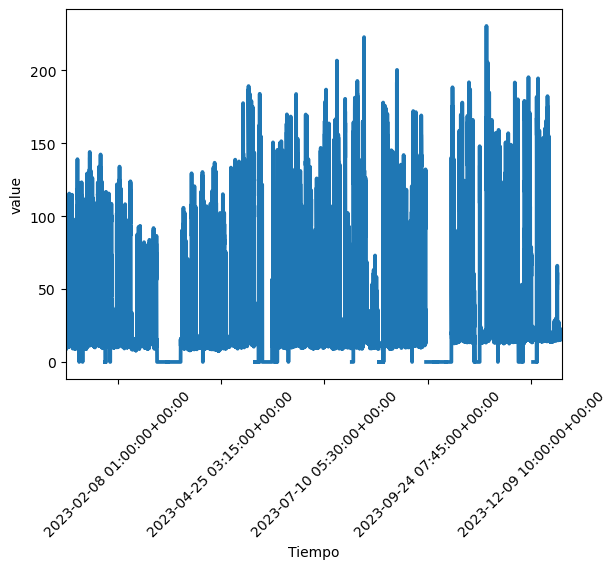

In [70]:
graficar_serie(df_11A_clean, obs='value')

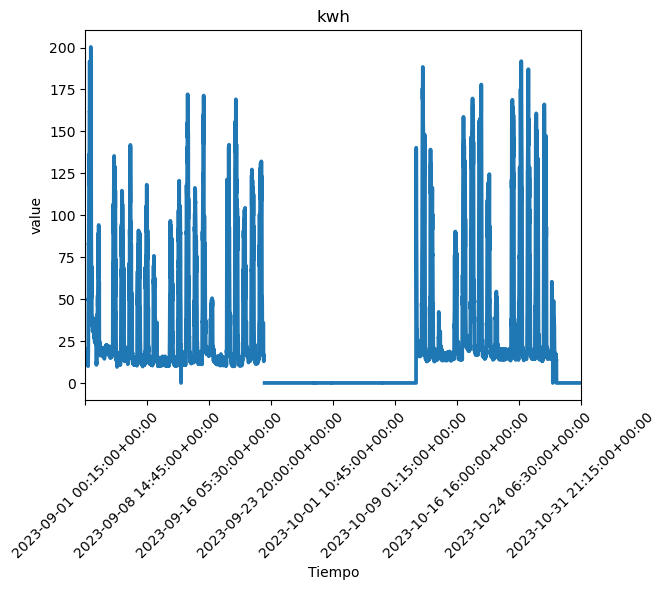

In [89]:
fecha_visualizar=df_11A_clean[(df_11A_clean.index>"2023-09-01")&(df_11A_clean.index<"2023-11")]
graficar_serie(fecha_visualizar, obs='value',titulo="kwh")

Al analizar los valores faltantes, observamos que están acompañados por valores de 0. Esto nos lleva a cuestionar si los datos fueron tratados previamente y, de ser así, si se aplicó el tratamiento adecuado para este tipo de información. Cabe destacar que, incluso con un uso mínimo, los sistemas esenciales de un edificio, como servidores, equipos de seguridad (cámaras, alarmas), luces de emergencia o dispositivos en modo de espera (standby), suelen generar un consumo energético base. Este consumo rara vez es igual a 0. Por lo tanto, es fundamental plantear estas interrogantes para realizar un análisis más detallado y garantizar la calidad de los datos.
Por el momento continuaremos con una imputacion de datos faltantes

In [79]:
# Comencemos definiendo un listado de métodos de interpolación a aplicar
metodos = [
    'linear',
    'quadratic',
    'cubic',
    'nearest',
    'spline'
]

# Y ahora iteremos por cada método, realicemos la interpolación y almacenemos el resultado
# en una nueva columna del DataFrame original. En caso de que el método sea "spline" especificaremos
# un orden igual a 3
for metodo in metodos:
    if metodo != 'spline':
        df_11A_clean[metodo] = df_11A_clean['value'].interpolate(method=metodo)
    else:
        df_11A_clean[metodo] = df_11A_clean['value'].interpolate(method=metodo, order=3)

# E imprimamos en pantalla el DataFrame actualizado
df_11A_clean.head()

,value,linear,quadratic,cubic,nearest,spline
2023-01-01 00:00:00+00:00,15.66,15.66,15.66,15.66,15.66,15.66
2023-01-01 00:15:00+00:00,15.39,15.39,15.39,15.39,15.39,15.39
2023-01-01 00:30:00+00:00,12.59,12.59,12.59,12.59,12.59,12.59
2023-01-01 00:45:00+00:00,11.26,11.26,11.26,11.26,11.26,11.26
2023-01-01 01:00:00+00:00,16.10,16.10,16.10,16.10,16.10,16.10


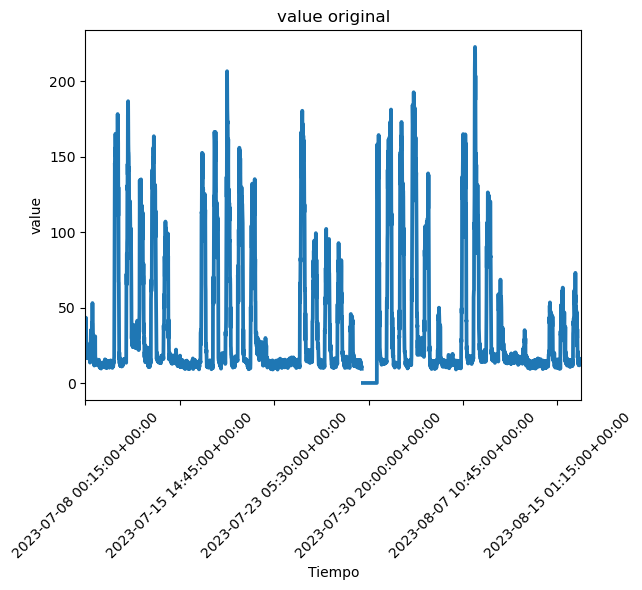

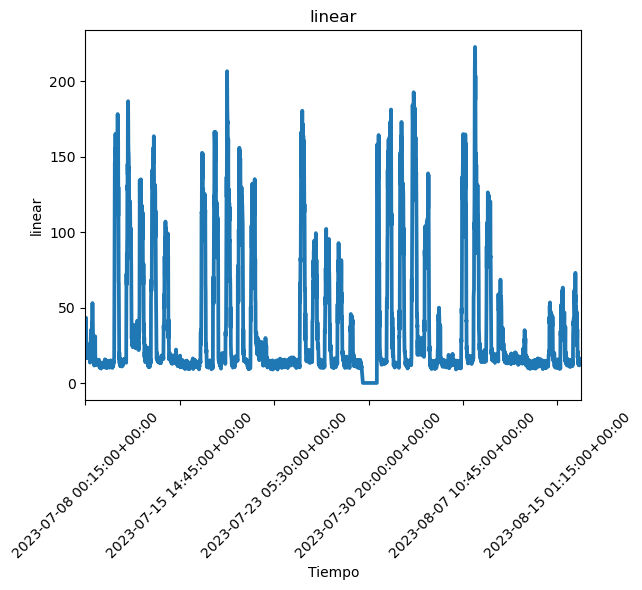

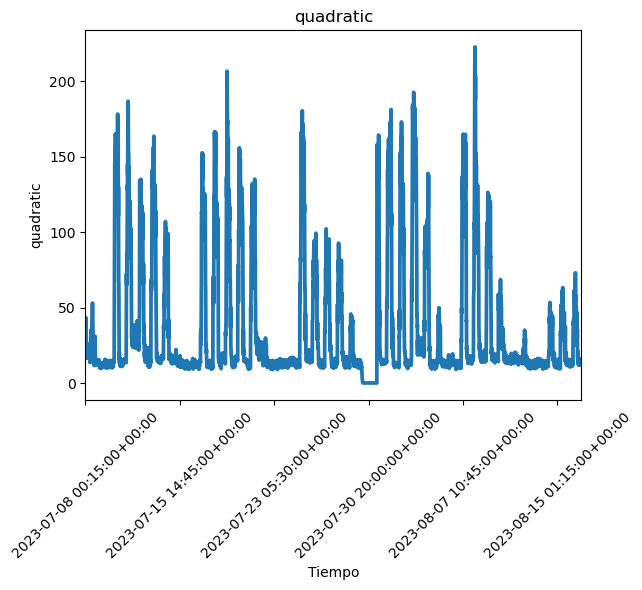

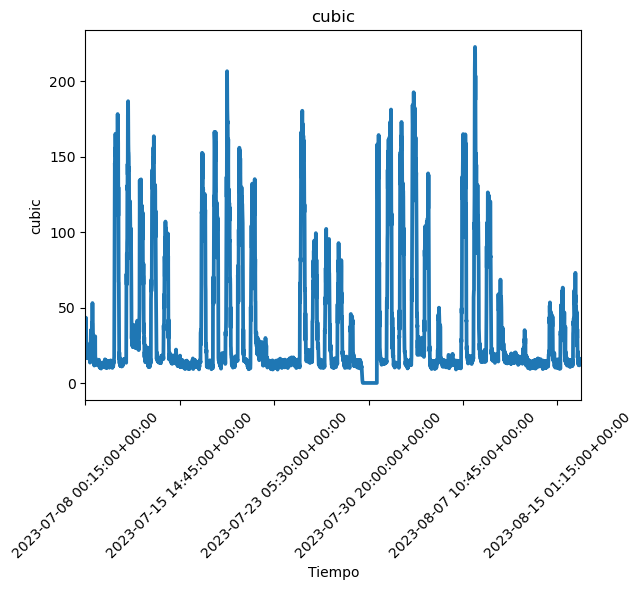

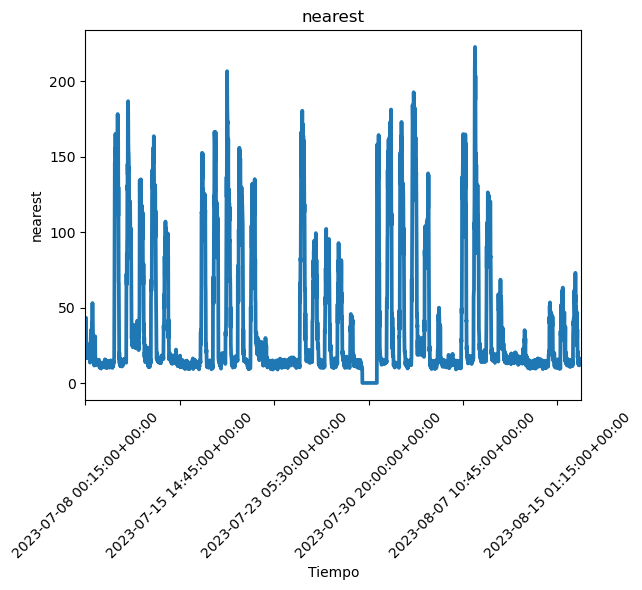

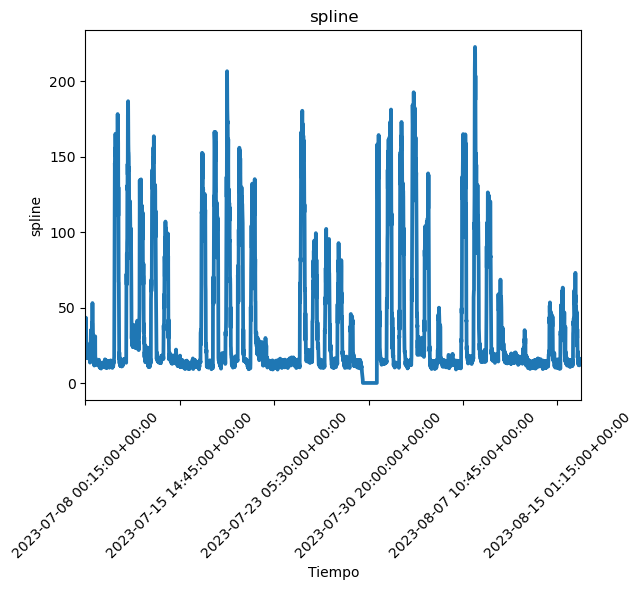

In [93]:
fecha_visualizar=df_11A_clean[(df_11A_clean.index>"2023-07-08")&(df_11A_clean.index<"2023-08-17")]
graficar_serie(fecha_visualizar, 'value', 'value original')
for metodo in metodos:
    graficar_serie(fecha_visualizar, metodo, metodo)

Los métodos de interpolación **lineal** y **nearest** son los que mejor se ajustan al comportamiento esperado de los datos, ya que otros métodos generan valores incoherentes, como números negativos. Sin embargo, es importante considerar que la interpolación por vecinos más cercanos (**nearest**) puede ser sensible a valores extremos, lo que podría introducir distorsiones en ciertos casos. Por esta razón, seleccionaremos el método de interpolación **lineal**, que ofrece una transición más suave y consistente, para procesar nuestros datos en esta etapa.

In [115]:
#guardamos el dataset para su posterior analisis 
df_11A_clean.linear.to_frame(name="kwh")\
    .rename_axis("timestamp")\
    .to_csv(data_dir("interim","11A_clean.csv"), index=True)